In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Data set input here

In [2]:
df = pd.read_csv("data/sentimentdataset.csv")
path = r'data/sentimentdataset_clean.xlsx'
df2 = pd.read_excel(path, sheet_name=0, index_col=False).reset_index(drop=True)
df3=pd.read_excel(path,sheet_name=1)

#df3.head()

In [3]:
# Display the first few rows

#df2.head()


In [4]:
#df2.info()


In [5]:

#df2.describe()

Data cleaning 

In [6]:

# Handle missing values (if any)

# #Check for missing values
missing_values = df2.isnull().sum()
#print(missing_values)
df2.fillna(value='', inplace=True)  # Replace missing values with empty strings

# Reset the index and set its name as 'index'
df.reset_index(drop=True, inplace=True)


#df2.head()



In [7]:

#Total likes according to the country

# Strip any leading/trailing spaces from the Platform column
#df2['Platform'] = df2['Platform'].str.strip()
#df2['Country'] = df2['Country'].str.strip()


#Group by 'Country' and sum 'Likes'
total_likes_by_country = df2.groupby('Country')['Likes'].sum().reset_index()


# Sort the results in ascending order
total_likes_by_country = total_likes_by_country.sort_values(by='Likes', ascending=False)


# Print the results
#print(total_likes_by_country)

Likes according to country based on Platform

In [8]:


# Group by 'Country' and 'Platform' to find the platform with the most likes for each country
total_likes_by_country_platform = df2.groupby(['Country', 'Platform'])['Likes'].sum().reset_index()

# Sort the results in descending order by 'Likes' for each country
total_likes_by_country_platform = total_likes_by_country_platform.sort_values(by='Likes', ascending=False)

# Find the platform with the most likes for each country
platform_with_most_likes_by_country = total_likes_by_country_platform.groupby('Country').head(1)

# Print the platform with the most likes for each country
print("\nPlatform with the most likes for each country:")
print(platform_with_most_likes_by_country)


Platform with the most likes for each country:
           Country   Platform  Likes
55             USA  Instagram   3331
52              UK  Instagram   2255
11          Canada    Twitter   1831
26           India    Twitter   1107
1        Australia  Instagram    941
44    South Africa  Instagram    430
18          France    Twitter    375
19         Germany   Facebook    370
32           Japan   Facebook    335
6           Brazil  Instagram    330
28           Italy   Facebook    220
46           Spain    Twitter    155
38     Netherlands   Facebook    145
23          Greece    Twitter    140
4          Belgium    Twitter    140
47          Sweden  Instagram    140
15         Denmark  Instagram     80
50        Thailand  Instagram     70
14  Czech Republic   Facebook     70
35          Jordan    Twitter     60
31         Jamaica  Instagram     60
48     Switzerland  Instagram     60
13        Colombia   Facebook     55
41            Peru   Facebook     55
42        Portugal   Facebo

Visualize it According to the country

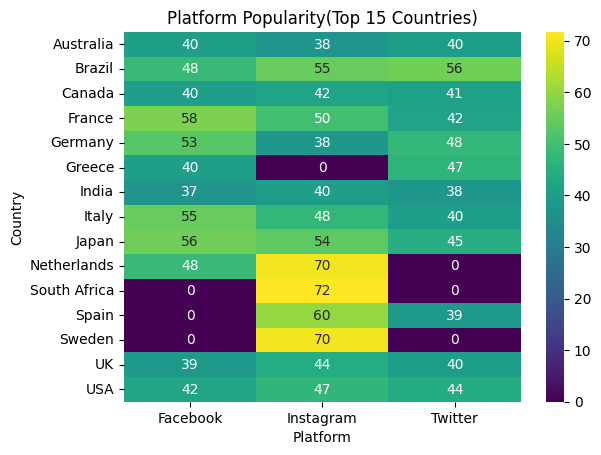

In [9]:
top_15_countries = total_likes_by_country.head(15)

# 4. Pivot the DataFrame for the heatmap (using the filtered countries)
heatmap_data = df2[df2['Country'].isin(top_15_countries['Country'])].pivot_table(index='Country', columns='Platform', values='Likes', fill_value=0)

# 5. Create the heatmap (adjust the colormap as desired)
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Platform Popularity(Top 15 Countries)')
plt.show()

Analyze the sentiment of posts of social media over different time periods such as year, month, day or hour. 


Hours wise

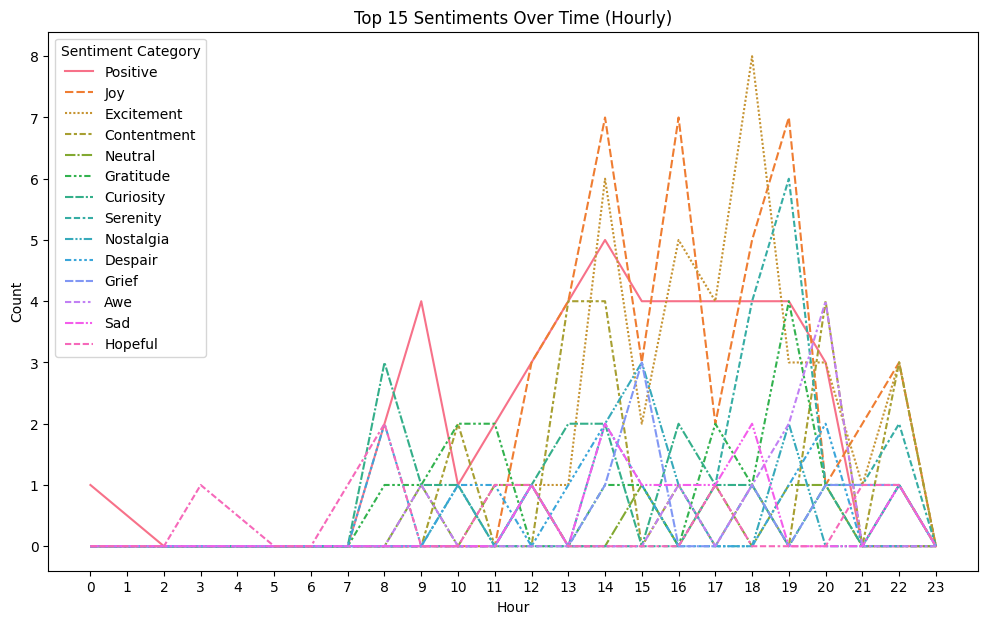

In [10]:

# Assuming 'sentiment_category' is the column containing sentiment labels
sentiment_counts = df3['SpecificSentiment'].value_counts()

# Top 15 sentiments
top_15_sentiments = sentiment_counts.head(15)

# Group by hour and count sentiment categories
df_grouped_hour = df3.groupby(df3['Timestamp'].dt.hour)['SpecificSentiment'].value_counts().unstack().fillna(0)

# Filter the grouped DataFrame for the top 15 sentiments (Option 1)
column_names = df_grouped_hour.columns
top_15_sentiments = top_15_sentiments[top_15_sentiments.index.isin(column_names)]
df_grouped_hour = df_grouped_hour[top_15_sentiments.index]

# Visualize
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_grouped_hour)
plt.title('Top 15 Sentiments Over Time (Hourly)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')

# Adjust xticks to show all hours (0 to 23)
plt.xticks(range(24))

plt.show()

Days wise


In [13]:
# Create a list of days in the desired order
#day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame to match the desired order
#df_grouped_day_name = df_grouped_day_name.reindex(day_order, axis=0)

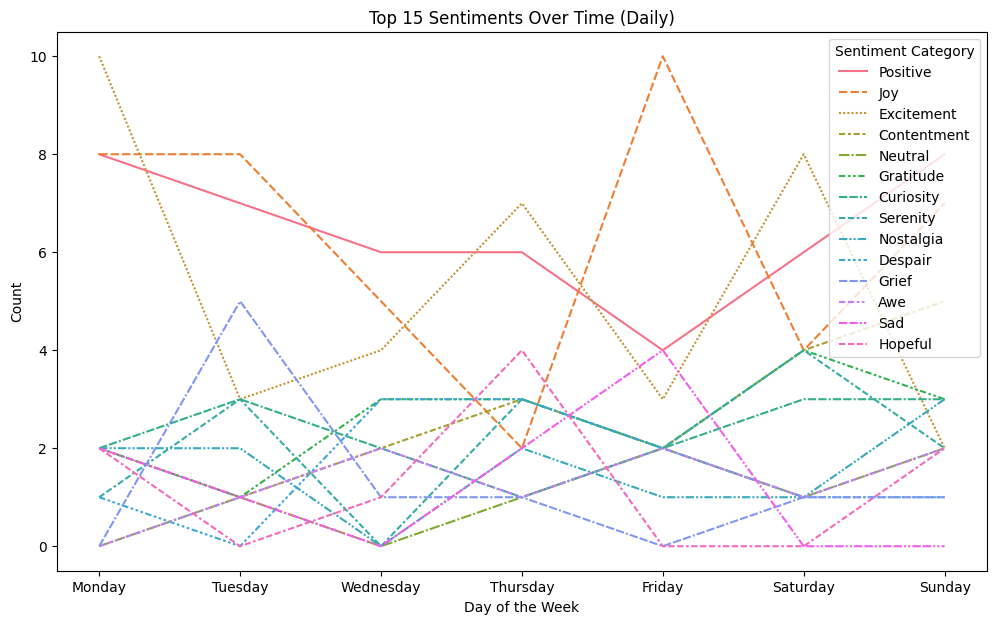

In [ ]:


# Assuming 'sentiment_category' is the column containing sentiment labels
sentiment_counts = df3['SpecificSentiment'].value_counts()

# Top 15 sentiments
top_15_sentiments = sentiment_counts.head(15)

# Group by day name and count sentiment categories
df_grouped_day_name = df3.groupby(df3['Timestamp'].dt.strftime('%A'))['SpecificSentiment'].value_counts().unstack().fillna(0)

# Create a list of days in the desired order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame to match the desired order
df_grouped_day_name = df_grouped_day_name.reindex(day_order, axis=0)

# Filter the grouped DataFrame for the top 15 sentiments (Option 1)
column_names = df_grouped_day_name.columns
top_15_sentiments = top_15_sentiments[top_15_sentiments.index.isin(column_names)]
df_grouped_day_name = df_grouped_day_name[top_15_sentiments.index]

# Visualize
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_grouped_day_name)
plt.title('Top 15 Sentiments Over Time (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')

# Adjust xticks to show all days of the week
plt.xticks(range(len(df_grouped_day_name.index)), df_grouped_day_name.index)

plt.show()

HASHTAG & plot them on Bar Chart

In [ ]:

from collections import Counter

#Split hashtags and explode into separate rows

hashtags_series = df['Hashtags'].str.split().explode()

#Count the occurrences of each hashtag

hashtag_count = Counter(hashtags_series)
#print(hashtag_count)

#Convert to DataFrame for easier handling
hashtag_df = pd.DataFrame(hashtag_count.items(),columns=['Hashtag','Count'])
hashtag_df = hashtag_df.sort_values(by='Count', ascending=False)



# Display the top hashtags
top_hashtags = hashtag_df.head(20)
#top_hashtags


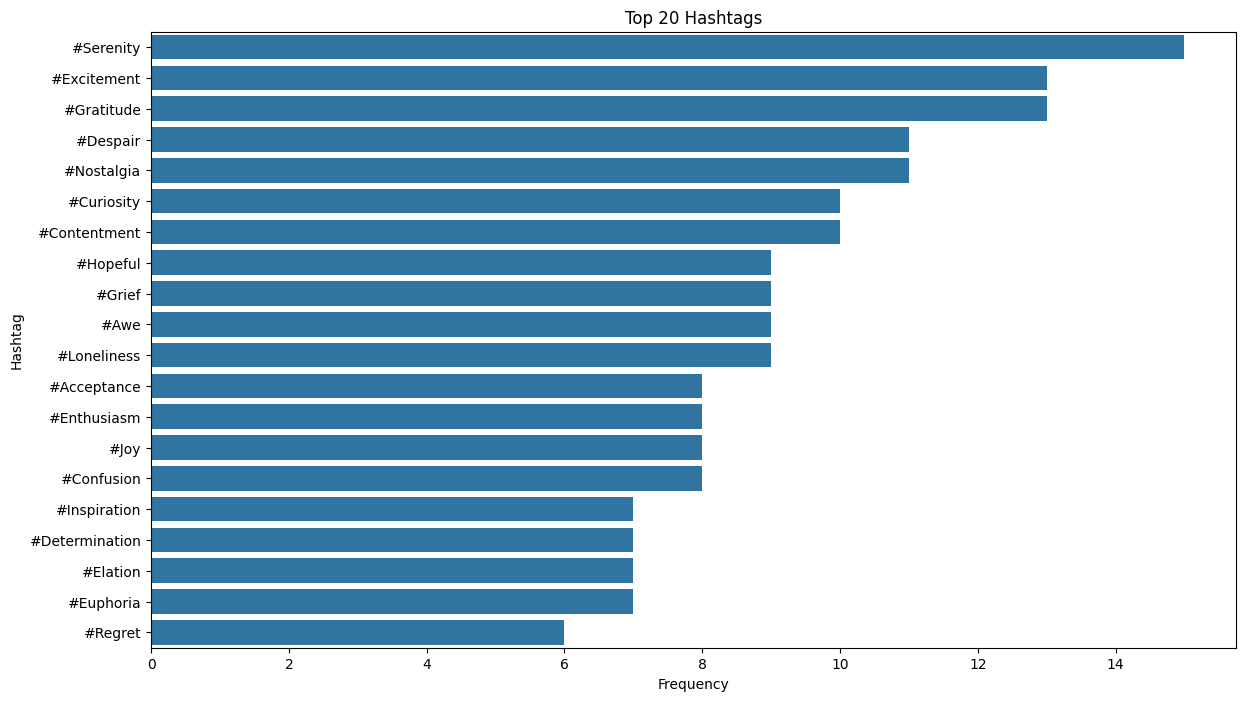

In [ ]:
#Bar  chart for top hashtags

plt.figure(figsize=(14,8))
sns.barplot(x='Count', y= 'Hashtag', data=top_hashtags)
plt.title('Top 20 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')

#display
plt.show()


Generating a world cloud if it's good.

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_count)

# Display the word cloud
#plt.figure(figsize=(19, 7))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.title('Word Cloud of Hashtags')
#plt.show()


Find uses according to the Timing

In [ ]:
#First we need to convert it to pd date time
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#df['Timestamp'] = pd.to_datetime(df['Timestamp'] ,format = '%y-%m-%d %I-%p')
df.set_index('Timestamp', inplace=True)
##df['Timestamp']
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
Timestamp,,,,,,,,,,,,
2023-01-15 12:30:00,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
2023-01-15 08:45:00,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2023-01-15 15:45:00,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
2023-01-15 18:20:00,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
2023-01-15 19:55:00,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
#df.loc[0,'Timestamp'].day_name()

/var/folders/0_/ryhxg2cd71z1f4879zqk8ffr0000gn/T/ipykernel_1685/1797442657.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = df.resample('H').count()['Text']


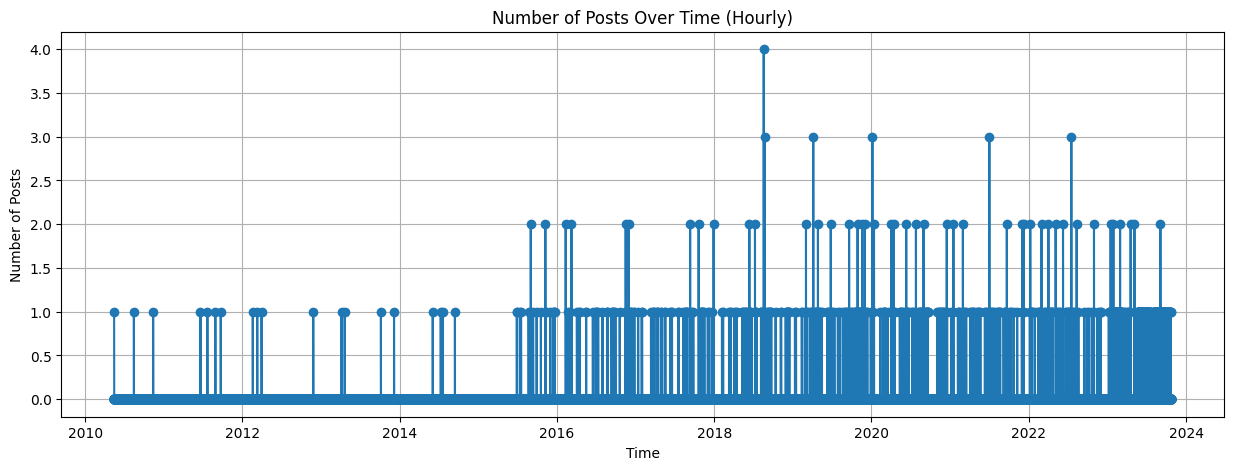

In [ ]:
# Group by hour to see hourly trends
hourly_counts = df.resample('H').count()['Text']

plt.figure(figsize=(15, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Number of Posts Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

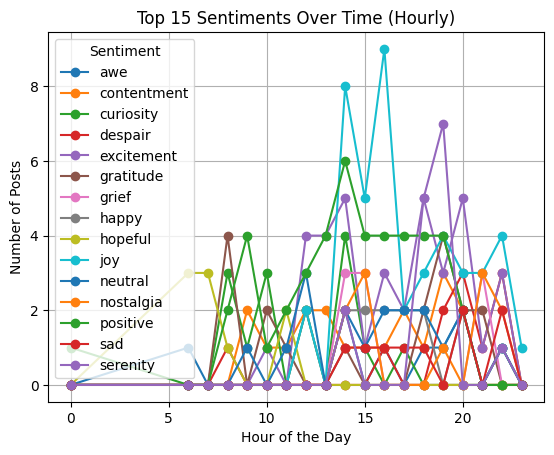

In [ ]:


# Normalize sentiment labels (convert to lowercase, strip spaces)
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

# Identify the top 15 sentiments by total count
top_15_sentiments = df['Sentiment'].value_counts().head(15).index

# Filter the DataFrame to include only the top 15 sentiments
filtered_df = df[df['Sentiment'].isin(top_15_sentiments)]

# Group by hour and sentiment, then plot
sentiment_counts = filtered_df.groupby([filtered_df.index.hour, 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sentiment_counts.plot(kind='line', marker='o')
plt.title('Top 15 Sentiments Over Time (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


/var/folders/0_/ryhxg2cd71z1f4879zqk8ffr0000gn/T/ipykernel_1685/2904231167.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  likes_hourly = df.resample('H').sum()['Likes']
/var/folders/0_/ryhxg2cd71z1f4879zqk8ffr0000gn/T/ipykernel_1685/2904231167.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  retweets_hourly = df.resample('H').sum()['Retweets']


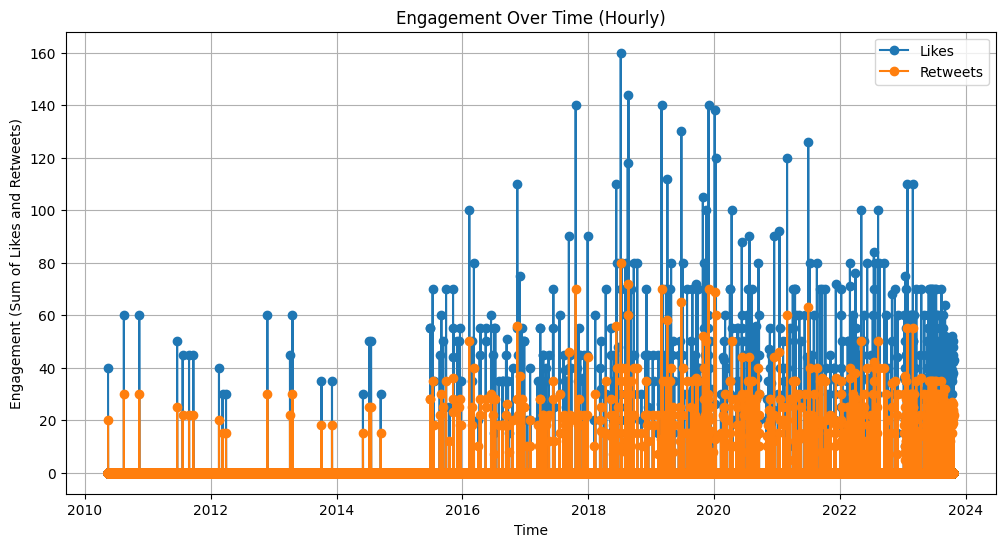

In [ ]:

# Resample to hourly data
likes_hourly = df.resample('H').sum()['Likes']
retweets_hourly = df.resample('H').sum()['Retweets']

plt.figure(figsize=(12, 6))
plt.plot(likes_hourly.index, likes_hourly.values, label='Likes', marker='o')
plt.plot(retweets_hourly.index, retweets_hourly.values, label='Retweets', marker='o')
plt.title('Engagement Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Engagement (Sum of Likes and Retweets)')
plt.legend()
plt.grid(True)
plt.show()
